import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 08</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [3]:
df0 = df.copy()
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [4]:
df0.head()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58


In [5]:
df0.groupby("status", dropna= False).mean()

,var2
status,
-,3.500000
FT,7.666667
PT,7.000000
NaN,9.000000


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [7]:
df0.groupby("status").value_counts(dropna=False)

status  id    gender  dept  var1  var2  salary
-       P003  M       AWS   5     5.0   59.0      1
        P008  F       FS    10    2.0   136.0     1
FT      P001  M       DS    2     8.0   NaN       1
        P004  F       AWS   nan   8.0   120.0     1
        P007  M       FS    nan   NaN   NaN       1
        P010  F       DS    -     7.0   125.0     1
PT      P002  F       FS    3     NaN   54.0      1
        P005  M       DS    7     11.0  58.0      1
        P006  F       NaN   1     NaN   75.0      1
        P009  M       NaN   14    3.0   60.0      1
dtype: int64

In [8]:
df0.var1[3]

'nan'

In [9]:
type(df0.var1[3])

str

In [10]:
type(df0.var2[1])

numpy.float64

In [11]:
type(df0.salary[6])

NoneType

In [12]:
type(np.nan)

float

In [13]:
type(None)

NoneType

In [14]:
pd.Series([1, np.nan, np.NaN, 2, None])

0    1.0
1    NaN
2    NaN
3    2.0
4    NaN
dtype: float64

In [15]:
print(0 * np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)

nan
nan
nan
nan
nan


In [16]:
print(np.nan == np.nan)

False


In [17]:
print(10 > np.nan)

False


In [18]:
print(np.inf > np.nan)

False


In [19]:
print(float("-inf") <  np.nan < float("inf"))

False


In [20]:
print(np.nan is np.nan)
print(0.3 == 3 * 0.1)

True
False


In [21]:
3*0.1

0.30000000000000004

In [22]:
id(np.nan)  # değişkendir

2463742978192

In [23]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [24]:
df0["salary"]

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [25]:
type(df0.salary[0])

float

In [26]:
type(df0.salary[6])

NoneType

In [27]:
type(df0.salary[1])

int

In [28]:
df0.salary.dtype

dtype('O')

In [29]:
df0.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [30]:
type(df0.salary[2])

int

In [31]:
type(df0.salary[10])

float

In [32]:
df0.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [33]:
type(df0.var1[3])

str

In [34]:
type(df0.var1[0])

str

**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [35]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [36]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [37]:
df0.isnull()  # df0.isna()  aynı şeyi yapar

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [38]:
pd.isnull == pd.isna

True

In [39]:
id(pd.isnull)

2463751689984

In [40]:
id(pd.isna)  # id'lerii bile aynı bak aynııı!

2463751689984

In [41]:
df0.isnull().any()

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [42]:
df0.any()

id        True
gender    True
status    True
dept      True
var1      True
var2      True
salary    True
dtype: bool

In [43]:
df0.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [44]:
df0.isnull().sum().sum()

9

In [45]:
df0.salary.isnull()

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [46]:
df0.salary.isnull().sum()

3

In [47]:
len(df0)

11

In [48]:
df0.isnull().sum() / len(df0)

id        0.000000
gender    0.000000
status    0.090909
dept      0.181818
var1      0.000000
var2      0.272727
salary    0.272727
dtype: float64

In [49]:
(df0.isnull().sum() / len(df0)) * 100  # yüzde kaç olduğunu bulduk

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [50]:
round(df0.isnull().sum() / len(df0)* 100,2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [51]:
((df0.isnull().sum() / df0.shape[0])*100).round(2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [52]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [53]:
df.isnull().any(axis=1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [54]:
df0[df0.isnull().any(axis =1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [55]:
df0[~df0.isnull().any(axis =1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [56]:
df0.isnull().all(axis =1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [57]:
df0.loc[df0.salary.isnull()]  # ÖNEMLİ !!

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [58]:
df0.dept == "FS" 

0     False
1      True
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
Name: dept, dtype: bool

In [59]:
df0.loc[df0.dept == "FS" ]

,id,gender,status,dept,var1,var2,salary
1,P002,F,PT,FS,3,NaN,54
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136


In [60]:
df0.loc[df0.dept.isnull(),["dept","salary"]]

,dept,salary
5,None,75
8,NaN,60


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [61]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [62]:
df0["var1"].map({"-":np.nan})

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [63]:
text = "cl-rusw-y"

In [64]:
text.replace("-", "a")

'clarusway'

In [65]:
df0.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [66]:
df0["var1"].replace(to_replace="-", value=np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [67]:
type(df0.var1[9])

str

In [68]:
df0["var1"].replace(to_replace="-", value=np.nan).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [69]:
type(df0.var1[9])

str

In [70]:
df0["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [71]:
df0["var1"].replace(["-","nan"],np.nan).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [72]:
df0["var1"].replace(["-","nan"],np.nan, inplace=True)

In [73]:
df0.var1 = df0.var1.astype("float")

In [74]:
df0["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [75]:
df0.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [76]:
df0["status"].replace(["-","nan"],np.nan,inplace=True)

In [77]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [78]:
df0["gender"].map({"M":0,"F":1})

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [79]:
df0["gender"].replace({"M":0,"F":1},inplace=True)
 #  df0["gender"].replace(["M","F"], [0,1],inplace=True) aynı işi yapar

In [80]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [81]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [82]:
df0.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [83]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [84]:
df.dropna(axis=0,how ="any",thresh = None,inplace=False)

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [85]:
df.dropna(axis=1,how ="any",thresh = None,inplace=False)

,id,gender,var1
0,P001,M,2
1,P002,F,3
2,P003,M,5
3,P004,F,nan
4,P005,M,7
5,P006,F,1
6,P007,M,nan
7,P008,F,10
8,P009,M,14
9,P010,F,-


In [86]:
df.dropna(axis=1,how ="all",thresh = None,inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

 ## 2 - Filling Missing Values (Imputation)
 
 - fillna()
 - where()
 - interpolate()

In [87]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


 ### a.Filling with a specific value

In [88]:
df0.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,0
1,P002,1,PT,FS,3.0,0.0,54
2,P003,0,0,AWS,5.0,5.0,59
3,P004,1,FT,AWS,0.0,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,0,1.0,0.0,75
6,P007,0,FT,FS,0.0,0.0,0
7,P008,1,0,FS,10.0,2.0,136
8,P009,0,PT,0,14.0,3.0,60
9,P010,1,FT,DS,0.0,7.0,125


In [89]:
df0["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [90]:
df0["var1"].fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 ### b.Filling with any Proper Value

In [91]:
df0["var1"].mean()

6.0

In [92]:
df0["var1"].fillna(df0["var1"].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [93]:
df0["var1"].median()

5.5

In [94]:
df0["var1"].fillna(df0["var1"].median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [95]:
df0.mean()  # kızmaya başladı yine 

C:\Users\Dell\AppData\Local\Temp\ipykernel_14868\258605951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df0.mean()  # kızmaya başladı yine


gender     0.454545
var1       6.000000
var2       6.625000
salary    85.875000
dtype: float64

In [96]:
df0.fillna(df0.mean()) # aha al sana 2 dayak

C:\Users\Dell\AppData\Local\Temp\ipykernel_14868\1097726601.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df0.fillna(df0.mean()) # aha al sana 2 dayak


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.000,85.875
1,P002,1,PT,FS,3.0,6.625,54.000
2,P003,0,NaN,AWS,5.0,5.000,59.000
3,P004,1,FT,AWS,6.0,8.000,120.000
4,P005,0,PT,DS,7.0,11.000,58.000
5,P006,1,PT,None,1.0,6.625,75.000
6,P007,0,FT,FS,6.0,6.625,85.875
7,P008,1,NaN,FS,10.0,2.000,136.000
8,P009,0,PT,NaN,14.0,3.000,60.000
9,P010,1,FT,DS,6.0,7.000,125.000


In [97]:
df0.fillna({"dept": "other","var1": df0.var1.mean(),"var2":df0.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,7.5,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,6.0,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,other,1.0,7.5,75
6,P007,0,FT,FS,6.0,7.5,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,other,14.0,3.0,60
9,P010,1,FT,DS,6.0,7.0,125


In [98]:
df0.mean()[["var1","var2"]]   # ooo büyük dayk yicem

C:\Users\Dell\AppData\Local\Temp\ipykernel_14868\3012630899.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df0.mean()[["var1","var2"]]   # ooo büyük dayk yicem


var1    6.000
var2    6.625
dtype: float64

In [99]:
df0.fillna(df0.mean()[["var1","var2"]])   # ölcez az kaldı

C:\Users\Dell\AppData\Local\Temp\ipykernel_14868\3479615588.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df0.fillna(df0.mean()[["var1","var2"]])   # ölcez az kaldı


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.000,NaN
1,P002,1,PT,FS,3.0,6.625,54
2,P003,0,NaN,AWS,5.0,5.000,59
3,P004,1,FT,AWS,6.0,8.000,120
4,P005,0,PT,DS,7.0,11.000,58
5,P006,1,PT,None,1.0,6.625,75
6,P007,0,FT,FS,6.0,6.625,None
7,P008,1,NaN,FS,10.0,2.000,136
8,P009,0,PT,NaN,14.0,3.000,60
9,P010,1,FT,DS,6.0,7.000,125


**where() Replace values where the condition is False.**

In [100]:
df0.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [101]:
df0.salary = df0.salary.astype("float")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


**Fill NaN values using an interpolation method.**

In [103]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [104]:
df0.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,6.5,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,6.0,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,8.0,75.0
6,P007,0,FT,FS,5.5,5.0,105.5
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,10.0,7.0,125.0


In [105]:
df0.salary.dtype

dtype('float64')

For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 ### c.Filling the Missing Values of Categorical Variables

In [106]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [107]:
df0["dept"].mode()[0]

'AWS'

In [108]:
df0.dept.fillna(df0["dept"].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

In [109]:
df0.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [110]:
df0.dept.fillna(method="ffill")  # öncekiyle doldurur(ffill)

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [111]:
df0.status

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [112]:
df0["status"].fillna(method="bfill")   # sonrakiyle doldurur(bfill)

0      FT
1      PT
2      FT
3      FT
4      PT
5      PT
6      FT
7      PT
8      PT
9      FT
10    NaN
Name: status, dtype: object

 ### d.Filling by condition & by Group of the Categorical Variables 

In [113]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [114]:
df0["dept"].fillna(method="ffill",inplace=True)
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [115]:
df0[["status", "salary"]]


,status,salary
0,FT,NaN
1,PT,54.0
2,NaN,59.0
3,FT,120.0
4,PT,58.0
5,PT,75.0
6,FT,NaN
7,NaN,136.0
8,PT,60.0
9,FT,125.0


In [116]:
df0.loc[df0["salary"]<100, ["status"]]

,status
1,PT
2,NaN
4,PT
5,PT
8,PT


In [117]:
df0.loc[df0["salary"] >= 100, ["status"]]


,status
3,FT
7,NaN
9,FT


In [118]:
df0.loc[df0["salary"]>=100,"status"].mode()[0]

'FT'

In [119]:
# inplace=True didn't work
df0.loc[df0["salary"]>=100,"status"].fillna(df0.loc[df0["salary"]>=100,"status"].mode()[0],inplace=True)
df0.loc[df0["salary"]<100, "status"].fillna(df0.loc[df0["salary"]<100,"status"].mode()[0],inplace=True)
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [120]:
df0.loc[df0["salary"]>=100,"status" ]= df0.loc[df0["salary"]>=100,"status"].fillna(df0.loc[df0["salary"]>=100,"status"].mode()[0])

df0.loc[df0["salary"]<100, "status"]=df0.loc[df0["salary"]<100, "status"].fillna(df0.loc[df0["salary"]<100,"status"].mode()[0])


In [121]:
df0

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,PT,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,FT,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [122]:
#    İnplace parametresi loc ile çalışmadığı için atama ile değişiklikleri kalıcı hale getirebiliyoruz. 
#    Ancak, atamanın loc[ ] tarafından oluşturulan koşulla eşleşmesi gerekir; aksi halde DataFrame'in tamamında değişiklikler
#  yapmış olursunuz.

**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [123]:
df0[["gender", "dept", "status", "salary"]]


,gender,dept,status,salary
0,0,DS,FT,NaN
1,1,FS,PT,54.0
2,0,AWS,PT,59.0
3,1,AWS,FT,120.0
4,0,DS,PT,58.0
5,1,DS,PT,75.0
6,0,FS,FT,NaN
7,1,FS,FT,136.0
8,0,FS,PT,60.0
9,1,DS,FT,125.0


In [124]:
df0.groupby(["gender","dept"])["status"].apply(lambda x :x.mode()[0])

gender  dept
0       AWS     PT
        DS      FT
        FS      FT
1       AWS     FT
        DS      FT
        FS      FT
Name: status, dtype: object

In [125]:
df0.groupby(["gender", "dept"])["status"].agg(lambda x: pd.Series.mode(x)[0])
# df0.groupby(["gender", "dept"])["status"].agg(lambda x: pd.Series.mode(x))

gender  dept
0       AWS     PT
        DS      FT
        FS      FT
1       AWS     FT
        DS      FT
        FS      FT
Name: status, dtype: object

In [126]:
df0.groupby(["gender", "dept"], as_index=True)["status"].apply(lambda x: pd.Series.mode(x)[0])

gender  dept
0       AWS     PT
        DS      FT
        FS      FT
1       AWS     FT
        DS      FT
        FS      FT
Name: status, dtype: object

In [127]:
df0.groupby(["gender","dept"])["status"].transform(lambda x :x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [128]:
df0.groupby(["gender", "dept"])["status"].apply(lambda x: x.mode()).index

MultiIndex([(0, 'AWS', 0),
            (0,  'DS', 0),
            (0,  'DS', 1),
            (0,  'FS', 0),
            (0,  'FS', 1),
            (1, 'AWS', 0),
            (1,  'DS', 0),
            (1,  'DS', 1),
            (1,  'FS', 0),
            (1,  'FS', 1)],
           names=['gender', 'dept', None])

In [129]:
df0.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0]).reset_index(drop=True)

0    PT
1    FT
2    FT
3    FT
4    FT
5    FT
Name: status, dtype: object

In [130]:
df0.groupby(["gender", "dept"])["status"].transform(lambda x: pd.Series.mode(x)[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [131]:
df0["Trans_status"] = df0.groupby(["gender","dept"])["status"].transform(lambda x :x.mode()[0]).reset_index(drop=True)

In [132]:
df0

,id,gender,status,dept,var1,var2,salary,Trans_status
0,P001,0,FT,DS,2.0,8.0,NaN,FT
1,P002,1,PT,FS,3.0,NaN,54.0,FT
2,P003,0,PT,AWS,5.0,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7.0,11.0,58.0,FT
5,P006,1,PT,DS,1.0,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10.0,2.0,136.0,FT
8,P009,0,PT,FS,14.0,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


In [133]:
df0["status"].fillna(df0["Trans_status"], inplace=True)
df0
# df0["status"].fillna(df0.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]).reset_index(drop=True), inplace=True)


,id,gender,status,dept,var1,var2,salary,Trans_status
0,P001,0,FT,DS,2.0,8.0,NaN,FT
1,P002,1,PT,FS,3.0,NaN,54.0,FT
2,P003,0,PT,AWS,5.0,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7.0,11.0,58.0,FT
5,P006,1,PT,DS,1.0,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10.0,2.0,136.0,FT
8,P009,0,PT,FS,14.0,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [134]:
df0.groupby("dept")["salary"].mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [135]:
df0.groupby(["status", "dept"])["salary"].mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [136]:
df0.groupby(["status", "dept"])["salary"].transform("mean")

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [137]:
df0["trans_salary"] = df0.groupby(["status","dept"])["salary"].transform("mean")
df0

,id,gender,status,dept,var1,var2,salary,Trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,0,FT,FS,NaN,NaN,NaN,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,NaN,7.0,125.0,FT,125.0


In [138]:
df0["salary"].fillna(df0.groupby(["status", "dept"])["salary"].transform("mean"), inplace=True)
df0
# df0["salary"].fillna(df["trans_salary"], inplace=True)

,id,gender,status,dept,var1,var2,salary,Trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,0,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,NaN,7.0,125.0,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [139]:
df0.groupby("gender").var1.mean()


gender
0    6.800000
1    4.666667
Name: var1, dtype: float64

In [140]:
df0.groupby(["gender", "status"])["var1"].mean()

gender  status
0       FT         2.0
        PT         8.0
1       FT        10.0
        PT         2.0
Name: var1, dtype: float64

In [141]:
df0.groupby(["gender","status"])["var1"].transform("mean")

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [142]:
trans_var1 = df0.groupby(["gender", "status"])["var1"].transform("mean")
trans_var1

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [143]:
df0["var1"].fillna(trans_var1, inplace=True)
df0

,id,gender,status,dept,var1,var2,salary,Trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,10.0,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,0,FT,FS,2.0,NaN,136.0,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,10.0,7.0,125.0,FT,125.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [144]:
df0["var2"]

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [145]:
df0.groupby(["status"])["var2"].mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [146]:
trans_var2 = df0.groupby(["status"])["var2"].transform("mean")
trans_var2

0     6.25
1     7.00
2     7.00
3     6.25
4     7.00
5     7.00
6     6.25
7     6.25
8     7.00
9     6.25
10    7.00
Name: var2, dtype: float64

In [147]:
df0["var2"].fillna(trans_var2, inplace=True)
df0

,id,gender,status,dept,var1,var2,salary,Trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.00,125.0,FT,125.0
1,P002,1,PT,FS,3.0,7.00,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.00,59.0,PT,59.0
3,P004,1,FT,AWS,10.0,8.00,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.00,58.0,FT,66.5
5,P006,1,PT,DS,1.0,7.00,75.0,FT,66.5
6,P007,0,FT,FS,2.0,6.25,136.0,FT,136.0
7,P008,1,FT,FS,10.0,2.00,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.00,60.0,FT,57.0
9,P010,1,FT,DS,10.0,7.00,125.0,FT,125.0


### e.Filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [148]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [149]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

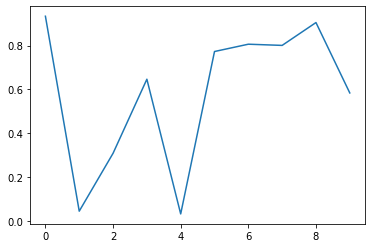

In [150]:
ser = pd.Series(np.random.rand(10))
ser.plot();

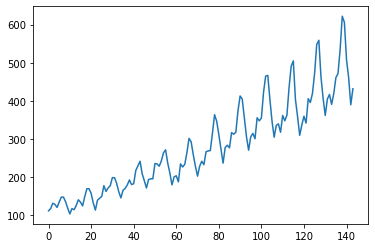

In [151]:
flights.passengers.plot();

In [152]:
flights_copy = flights.copy()

In [153]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [154]:
flights_copy.loc[np.random.randint(1, 144, 20), ["passengers"]]

,passengers
121,342
36,171
40,183
3,129
88,318
36,171
45,191
49,196
104,404
26,178


In [155]:
flights_copy.loc[np.random.randint(1, 144, 20), ["passengers"]] = np.nan
flights_copy

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,132.0
3,1949,Apr,129.0
4,1949,May,NaN
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,508.0
141,1960,Oct,461.0
142,1960,Nov,390.0


In [157]:
flights_copy.isnull().sum()

year           0
month          0
passengers    19
dtype: int64

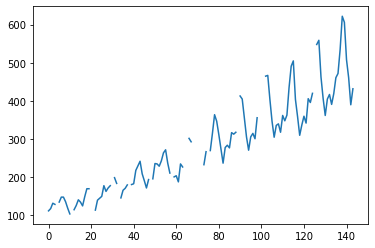

In [158]:
flights_copy.passengers.plot();

<AxesSubplot:>

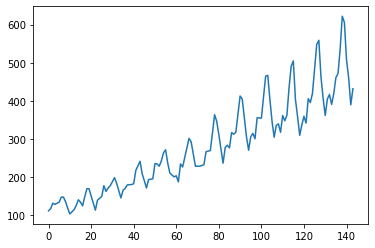

In [161]:
flights_copy.passengers.interpolate().plot()

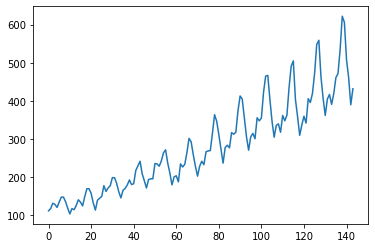

In [162]:
flights.passengers.plot();

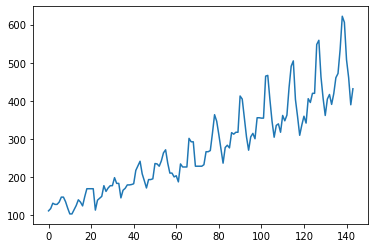

In [163]:
flights_copy.passengers.fillna(method = "ffill").plot(kind = "line");

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________